<a href="https://colab.research.google.com/github/jmquintana/email_classifier/blob/main/PST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Gas-2021.xlsx")

In [ ]:
df.rename(columns = {'From: (Name)':'From', 'From: (Type)':'FromType',  'To: (Name)':'To',  'To: (Type)':'ToType',  'CC: (Name)':'CC',  'CC: (Type)':'CCType'}, inplace = True)

In [ ]:
df.head()

,Folder,Subject,Body,From,FromType,To,ToType,CC,CCType,Importance,Sensitivity
0,SERVICIOS,Ud. tiene Facturas pendientes de Autorizar.,"Jose, \r\nUd. puede autorizar las siguientes f...",SAP_ALERT,SMTP,QUINTANA Jose Maria,EX,NaN,NaN,Normal,Normal
1,SERVICIOS,Ud. tiene Facturas pendientes de Autorizar.,"Jose, \r\nUd. puede autorizar las siguientes f...",SAP_ALERT,SMTP,QUINTANA Jose Maria,EX,NaN,NaN,Normal,Normal
2,SERVICIOS,Ud. tiene Facturas pendientes de Autorizar.,"Jose, \r\nUd. puede autorizar las siguientes f...",SAP_ALERT,SMTP,QUINTANA Jose Maria,EX,NaN,NaN,Normal,Normal
3,SERVICIOS,Ud. tiene Facturas pendientes de Autorizar.,"Jose, \r\nUd. puede autorizar las siguientes f...",SAP_ALERT,SMTP,QUINTANA Jose Maria,EX,NaN,NaN,Normal,Normal
4,SERVICIOS,Ud. tiene Facturas pendientes de Autorizar.,"Jose, \r\nUd. puede autorizar las siguientes f...",SAP_ALERT,SMTP,QUINTANA Jose Maria,EX,NaN,NaN,Normal,Normal


In [ ]:
folders = df.Folder.value_counts().index

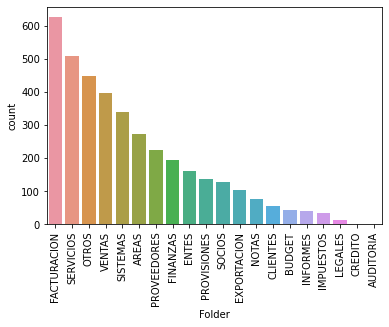

In [ ]:
sns.countplot(data=df, x='Folder', order=folders)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.isna().sum()

Folder            0
Subject           1
Body             97
From              1
FromType          1
To              147
ToType          147
CC             1824
CCType         1824
Importance        0
Sensitivity       0
dtype: int64

In [ ]:
df[df.isna().Subject]

,Folder,Subject,Body,From,FromType,To,ToType,CC,CCType,Importance,Sensitivity
1498,FACTURACION,NaN,NaN,QUINTANA Jose Maria,EX,SCHIAVELLI Hernan,EX,NaN,NaN,Normal,Normal


In [ ]:
mask = df.groupby('From').count()>5

In [ ]:
df2 = df.groupby('From').count()

In [ ]:
df2 = df2[mask.Folder]

In [ ]:
df2 = df2.sort_values(by='Folder', ascending=False)

In [ ]:
from_filtrado = df2.index

In [ ]:
df = df[~df.From.isna()]

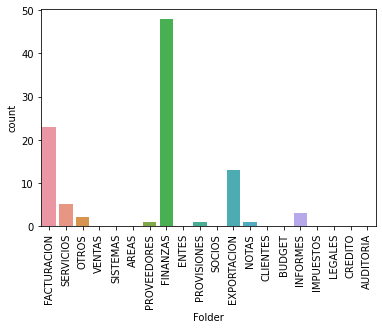

In [ ]:
sns.countplot(data=df[df.From.str.contains("GAZZA")], x='Folder', order=folders)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = df.copy()
data['Mail'] = data['Subject'].str.cat(data['Body'],sep=" ")
data = data[['From', 'To', 'Subject', 'Body', 'Folder', 'Mail']]
data = data[data.Folder.isin(folders[:10])]

In [ ]:
data.isna().sum()
data = data.dropna()

In [ ]:
# X = data.drop(['Folder'], axis=1)
X = data.Subject
y = data.Folder

In [ ]:
# Realizamos la división entre datos de entrenamiento y de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

modelS = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
modelS.fit(X_train, y_train)
labels = modelS.predict(X_test)

In [ ]:
dim = y_test.value_counts().to_dict()
inv_map = {v: k for k, v in dim.items()}
inv_map

{63: 'PROVISIONES',
 77: 'ENTES',
 95: 'FINANZAS',
 98: 'AREAS',
 117: 'PROVEEDORES',
 161: 'SISTEMAS',
 164: 'VENTAS',
 191: 'OTROS',
 256: 'SERVICIOS',
 317: 'FACTURACION'}

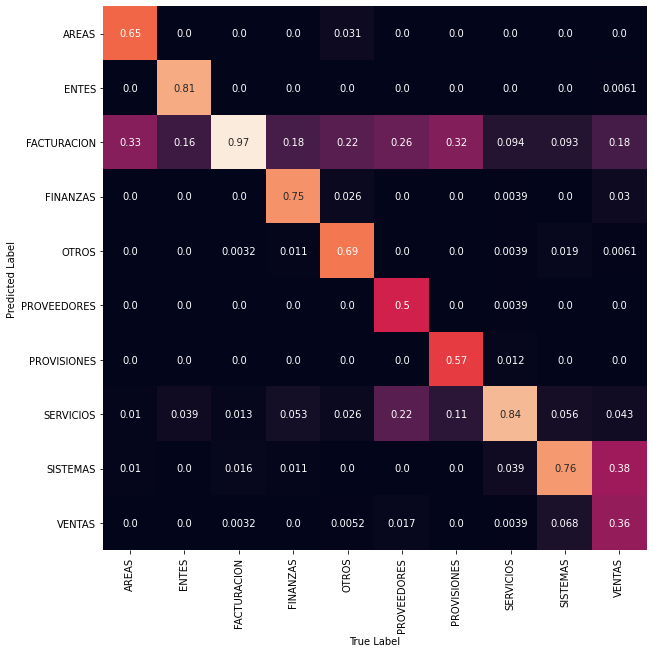

In [ ]:
from sklearn.metrics import confusion_matrix
matN = confusion_matrix(y_test, labels, normalize='true')
mat = confusion_matrix(y_test, labels)
vec = pd.DataFrame(mat.T.sum(axis=0), columns=['Count'])
dim = y_test.value_counts().to_dict()
inv_map = {v: k for k, v in dim.items()}
vec = vec.Count.map(inv_map)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(matN.T, square=True, annot=True, fmt='.2', cbar=False, xticklabels=vec, yticklabels=vec)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
data = df.copy()
data['Mail'] = data['Subject'].str.cat(data['Body'],sep=" ")
data = data[['From', 'To', 'Subject', 'Body', 'Folder', 'Mail']]
data = data[data.Folder.isin(folders[:10])]

In [ ]:
data.isna().sum()
data = data.dropna()

In [ ]:
# X = data.drop(['Folder'], axis=1)
X = data.Body
y = data.Folder

In [ ]:
# Realizamos la división entre datos de entrenamiento y de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

modelB = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
modelB.fit(X_train, y_train)
labels = modelB.predict(X_test)

# Probamos los dos modelos y su combinación

Subject:  Facturación Gas Cuenca Neuquina - Marzo de 2021 - Punta Senillosa
Body:  Adjunto planilla de facturación del gas de Punta Senillosa correspondiente al mes de referencia. 



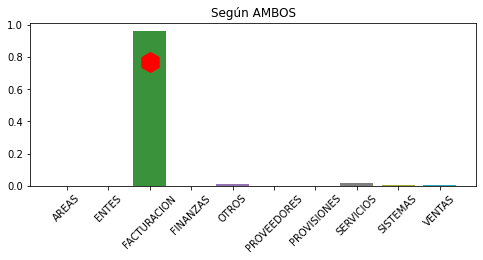

In [ ]:
rand = np.random.choice(X_test.index)
text = [data.Body[rand]]
real = [data.Folder[rand]]
# print(real[0])
print('Subject: ', data.Subject[rand])
print('Body: ', text[0][:100])

# plt.figure(figsize=(8,3))
dataS = modelS.predict_proba(text)
# sns.barplot(x=vec, y=dataS[0])
# plt.xticks([])
# plt.title('Según SUBJECT')
# plt.xlabel('')
# plt.show()

# plt.figure(figsize=(8,3))
dataB = modelB.predict_proba(text)
# sns.barplot(x=vec, y=dataB[0])
# plt.xticks([])
# plt.title('Según BODY')
# plt.xlabel('')
# plt.show()

plt.figure(figsize=(8,3))
dataC = np.multiply(dataS, dataB)
dataN = dataC/dataC.sum()
sns.barplot(x=vec, y=dataN[0])
plt.plot(np.where(vec.values == real[0])[0][0], max(dataN[0])*.8, 'hr', markersize=20)
plt.xticks(rotation=45)
plt.title('Según AMBOS')
plt.xlabel('')
plt.show()

# Reentrenamiento

In [ ]:
data = df.copy()
data = data[['From', 'To', 'Subject', 'Body', 'Folder']]
data = data[data.Folder.isin(folders[:10])]

In [ ]:
data.isna().sum()
data = data.dropna()

In [ ]:
Xs = data.Subject
Xb = data.Body
y = data.Folder

In [ ]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3)
Xb_train, Xb_test = Xb[Xs_train.index], Xb[Xs_test.index]

In [ ]:
pipeS = make_pipeline(TfidfVectorizer(), MultinomialNB())
pipeB = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
pipeS.fit(Xs_train, y_train)
pipeB.fit(Xb_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
labelsS = pipeS.predict(Xs_test)
labelsB = pipeB.predict(Xb_test)

In [ ]:
dataS = pipeS.predict_proba(Xs_test)
dataB = pipeB.predict_proba(Xb_test)
dataC = np.multiply(10*dataS, dataB)

In [ ]:
ind = np.argmax(dataC, axis=1)
labelsC = []
for i in ind:
  labelsC.append(modelB.classes_[i])

In [ ]:
def matrix(y_test, predicted):
  matN = confusion_matrix(y_test, predicted, normalize='true')
  mat = confusion_matrix(y_test, predicted)
  vec = pd.DataFrame(mat.T.sum(axis=0), columns=['Count'])
  dim = y_test.value_counts().to_dict()
  inv_map = {v: k for k, v in dim.items()}
  vec = vec.Count.map(inv_map)
  plt.figure(figsize=(10,10))
  sns.heatmap(matN.T, square=True, annot=True, fmt='.2', cbar=False, xticklabels=vec, yticklabels=vec)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.show()

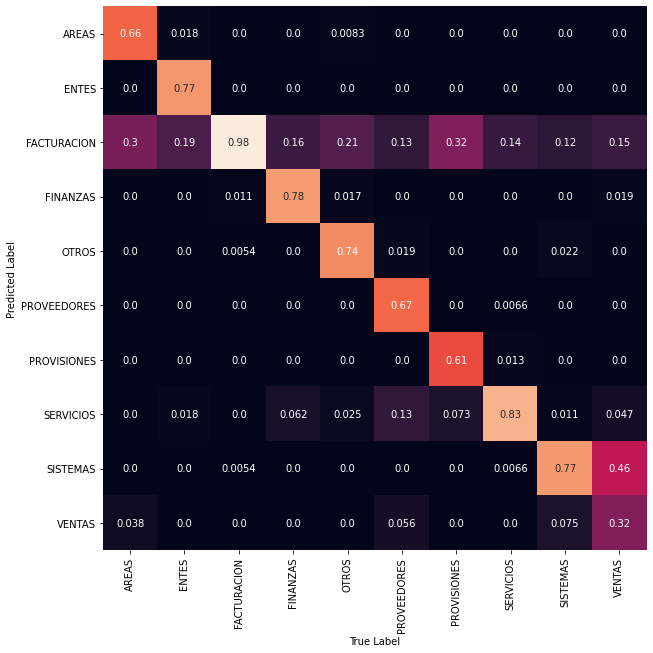

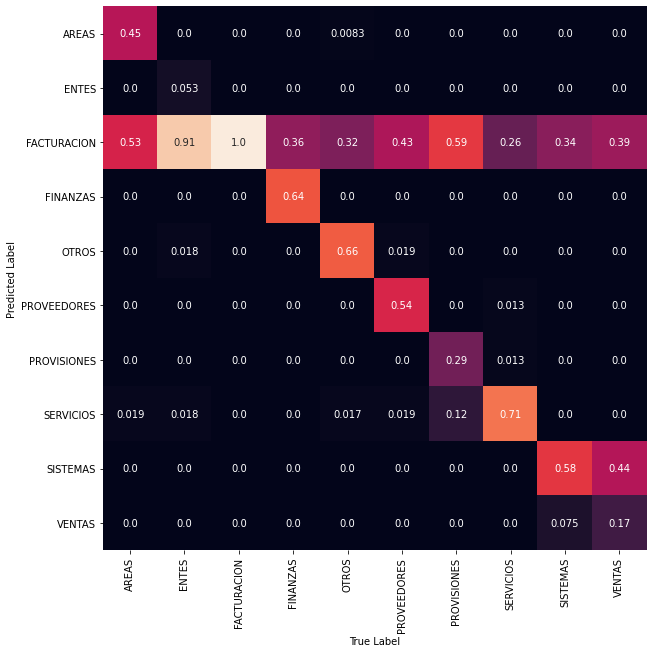

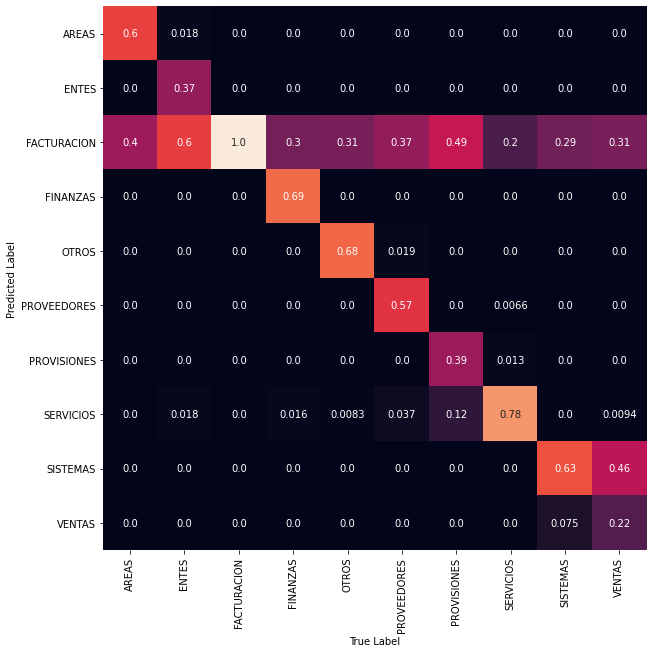

In [ ]:
matrix(y_test, labelsS)
matrix(y_test, labelsB)
matrix(y_test, labelsC)